# 자연어 처리, NLP(Natural Language Processing)
### 대한민국 국회 의안 말뭉치
> 파일 ID는 의안 번호를 의미

In [1]:
from IPython.display import Image as Show

In [2]:
!pip install wordcloud

In [3]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [4]:
!mkdir wordcloud

하위 디렉터리 또는 파일 wordcloud이(가) 이미 있습니다.


In [5]:
from konlpy.corpus import kobill
from konlpy.tag    import Twitter
from konlpy.tag    import Okt
from wordcloud     import WordCloud, STOPWORDS
from PIL import Image

import nltk

In [6]:
# 육아휴직관련 법안
files_ko = kobill.fileids()

In [7]:
files_dict = dict()
files_dict[0] = files_ko[0], '지방공무원법 일부개정법률안'
files_dict[1] = files_ko[1], '국가공무원법 일부개정법률안'
files_dict[2] = files_ko[2], '교육공무원법 일부개정법률안'
files_dict[3] = files_ko[3], '남녀고용평등과 일 ·가정 양립 지원에 관한 법률'
files_dict[4] = files_ko[4], '고등교육법 일부개정법률안'
files_dict[5] = files_ko[5], '하도급거래 공정화에 관한 법률 일부개정법률안'
files_dict[6] = files_ko[6], '행정절차법 일부개정법률안'
files_dict[7] = files_ko[7], '국군부대의 아랍에미리트(UAE)군 교육훈련 지원 등에 관한 파견 동의안'
files_dict[8] = files_ko[8], '국군부대의 소말리아 해역 파견연장 동의안'
files_dict[9] = files_ko[9], '결혼중개업의 관리에 관한 법률 일부개정법률안'

files_dict

{0: ('1809890.txt', '지방공무원법 일부개정법률안'),
 1: ('1809891.txt', '국가공무원법 일부개정법률안'),
 2: ('1809892.txt', '교육공무원법 일부개정법률안'),
 3: ('1809893.txt', '남녀고용평등과 일 ·가정 양립 지원에 관한 법률'),
 4: ('1809894.txt', '고등교육법 일부개정법률안'),
 5: ('1809895.txt', '하도급거래 공정화에 관한 법률 일부개정법률안'),
 6: ('1809896.txt', '행정절차법 일부개정법률안'),
 7: ('1809897.txt', '국군부대의 아랍에미리트(UAE)군 교육훈련 지원 등에 관한 파견 동의안'),
 8: ('1809898.txt', '국군부대의 소말리아 해역 파견연장 동의안'),
 9: ('1809899.txt', '결혼중개업의 관리에 관한 법률 일부개정법률안')}

In [8]:
b_idx = 9
bill_file = files_ko[b_idx]
bill_number = files_dict[b_idx][0][:-4]
bill_title  = files_dict[b_idx][1]

print('국회 의안 번호 : {} \n국회 의안 제목 : {}'.format(bill_number, bill_title))

국회 의안 번호 : 1809899 
국회 의안 제목 : 결혼중개업의 관리에 관한 법률 일부개정법률안


In [9]:
doc_ko = kobill.open(bill_file).read()
print(doc_ko[:300])

결혼중개업의 관리에 관한 법률 일부개정법률안

(한선교의원 대표발의 )

 의 안
 번 호

9899

발의연월일 : 2010.  11.  15.

발  의  자 : 한선교․손범규․이인기 

유성엽․이애주․이한성 

안홍준․김태원․안형환 

정갑윤 의원(10인)

제안이유

  최근 국제결혼의 상당수가 국제결혼중개업체를 통해 이루어지고 있

으나, 일부 국제결혼중개업자가 이윤만을 추구하기 위하여 사실과 다

른 정보나 거짓 정보를 제공하여 속성으로 성사된 국제결혼이 상대국

과의 외교적 마찰이나 결혼생활의 조기 파탄을 야기하는 등 


In [10]:
type(doc_ko), len(doc_ko)

(str, 8549)

In [11]:
okt = Okt()

tokens_ko = okt.nouns(doc_ko)
len(tokens_ko), tokens_ko[:10]

(1544, ['결혼', '중개업', '관리', '관', '법률', '일부', '개정', '법률', '안', '한선교'])

In [12]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 {}호'.format(bill_number))
ko

<Text: 대한민국 국회 의안 제 1809899호>

In [13]:
print("token length :", len(ko.tokens))             # returns number of tokens (document length)
print("unique token :", len(set(ko.tokens)))        # returns number of unique tokens

token length : 1544
unique token : 313


In [14]:
# frequency distribution
ko.vocab()

FreqDist({'제': 129, '결혼': 66, '항': 42, '호': 41, '중개업': 35, '등': 29, '국제': 27, '및': 26, '등록': 25, '중개': 23, ...})

<IPython.core.display.Javascript object>


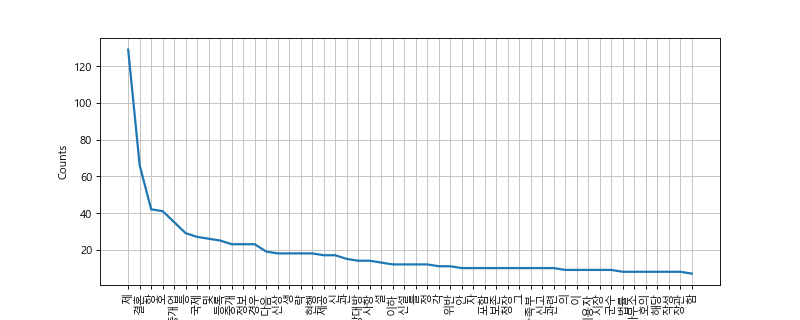

In [15]:
plt.figure(figsize=(10,4))
ko.plot(50)
plt.show()

In [16]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번', '제',
                      '호','을','이','다','만','로','가','를','항','등','및','생','략',
                      '신','관','설','정','각','그','함','중','령']

ko = [each_word for each_word in ko if each_word not in stop_words]

len(ko), ko[:10]

(1086, ['결혼', '중개업', '관리', '법률', '일부', '개정', '법률', '한선교', '의원', '대표'])

<IPython.core.display.Javascript object>


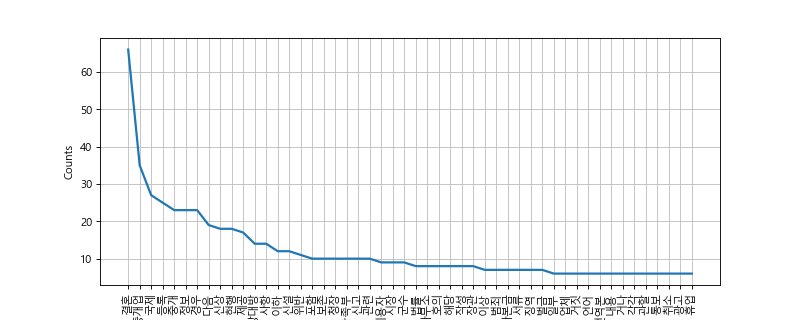

In [17]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809899호')

plt.figure(figsize=(10,4))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [18]:
ko.count('결혼')

66

<IPython.core.display.Javascript object>


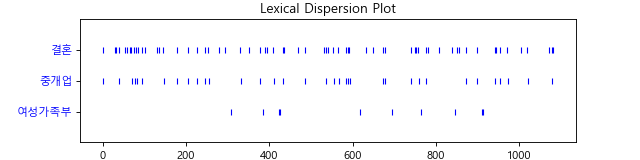

In [19]:
# 단어의 분포를 보여주는 플롯그래프 
plt.figure(figsize=(8,2))
ko.dispersion_plot(['결혼', '중개업', '여성가족부'])

In [22]:
# 대소문자 상관없이 일치단어 찾기
ko.concordance('결혼')

Displaying 25 of 66 matches:
 결혼 중개업 관리 법률 일부 개정 법률 한선교 의원 대표 발의 발의 연월
 이한성 안홍준 김태원 안형환 정갑윤 의원 인 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구
태원 안형환 정갑윤 의원 인 제안 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 위 사실 른 정보
 이유 최근 국제 결혼 상당수 국제 결혼 중개 업체 통해 일부 국제 결혼 중개업 이윤 추구 위 사실 른 정보 거짓 정보 제공 속성 성사 국제
중개업 이윤 추구 위 사실 른 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 국 외교 마찰 결혼 생활 조기 파탄 야기 문 발생 국제 결혼 
 른 정보 거짓 정보 제공 속성 성사 국제 결혼 상대 국 외교 마찰 결혼 생활 조기 파탄 야기 문 발생 국제 결혼 문화 정착 결혼 중개업 피
 결혼 상대 국 외교 마찰 결혼 생활 조기 파탄 야기 문 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록
외교 마찰 결혼 생활 조기 파탄 야기 문 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼
 발생 국제 결혼 문화 정착 결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위
결혼 중개업 피해 사례 최소 위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 
위해 국제 결혼 중개업 등록 기준 국제 결혼 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제
 중개업 인권 침해 불법 결혼 중개 행위 대한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정보 결혼 생활 유지 지장 초래 정
한 처벌 규정 또한 국제 결혼 중개업 이용자 상대방 제공 신상 정보 결혼 생활 유지 지장 초래 정신질환 병력